# DDoS Attack detection
## Ai for CS final project

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import random
import sklearn
import cv2
import os
from IPython.display import clear_output
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from keras.utils import to_categorical
from keras.models import Sequential
from imblearn.under_sampling import TomekLinks,RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

from sklearn import metrics
import seaborn as sns
from imblearn.combine import SMOTEENN
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:

# Read data from CSV files into separate DataFrames
df1 = pd.read_csv("/content/drive/MyDrive/archive/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2 = pd.read_csv("/content/drive/MyDrive/archive/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3 = pd.read_csv("/content/drive/MyDrive/archive/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4 = pd.read_csv("/content/drive/MyDrive/archive/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5 = pd.read_csv("/content/drive/MyDrive/archive/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6 = pd.read_csv("/content/drive/MyDrive/archive/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7 = pd.read_csv("/content/drive/MyDrive/archive/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8 = pd.read_csv("/content/drive/MyDrive/archive/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")

# Concatenate all DataFrames into a single DataFrame
data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])

# Delete the individual DataFrames to free up memory
del df1, df2, df3, df4, df5, df6, df7, df8

# Count the number of rows and columns in the resulting DataFrame
rowsNum, columnsNum = data.shape

# Print the shape of the DataFrame
print('data shape = {rows} x {columns}'.format(rows=rowsNum, columns=columnsNum))

# Display the first 5 rows of the DataFrame
data.head(rowsNum)


data shape = 2830743 x 79


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max          

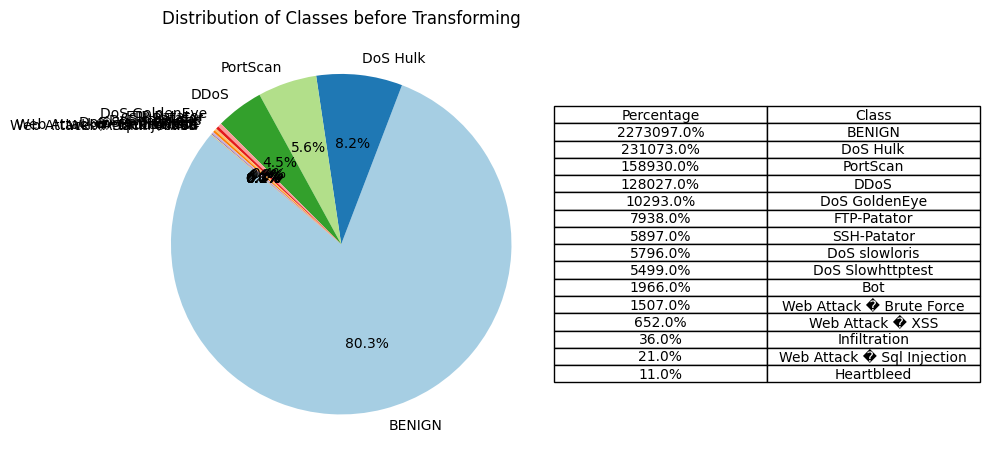

In [5]:
import numpy as np

# Your existing code
target = data[' Label'].value_counts()
fig, ax = plt.subplots(figsize=(10, 8))
pie = ax.pie(target, labels=target.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Classes before Transforming')

table_data = [[f'{count:.1f}%', label] for label, count in zip(target.index, target)]
table = plt.table(cellText=table_data, colLabels=['Percentage', 'Class'], cellLoc='center', loc='right')

# Adjust layout for better readability
plt.tight_layout()

# Shift the table to the right to avoid overlapping with the pie chart
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Adjust the scale factor based on your preference

plt.show()


In [6]:
data[' Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

There are multiple classes that can indicate an attack,
treating all classes other than benign as an attack as they are different types of attack

In [5]:
target_column = ' Label'
data[target_column] = data[target_column].apply(lambda x: 'ATTACK' if x != 'BENIGN' else x)

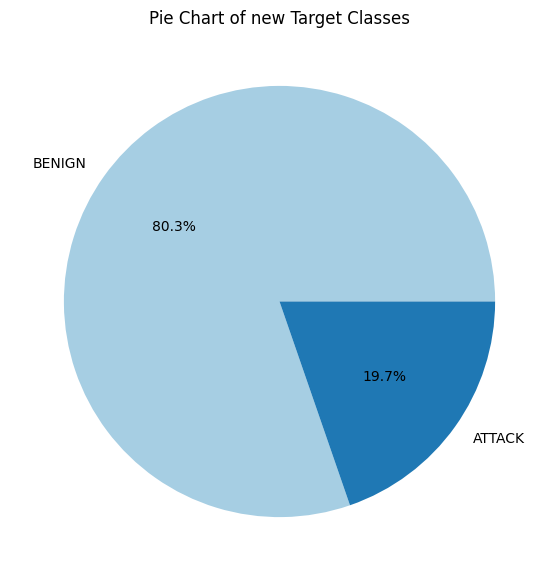

In [8]:
target_count = data[' Label'].value_counts()

# Plot a pie chart
plt.figure(figsize=(7,7))
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%', startangle=0, colors=plt.cm.Paired.colors)
plt.title(f'Pie Chart of new Target Classes')
plt.show()

As shown in the pie chart, there is a clear imbalance in the target dataset.
### Solving the imbalance of classes in data

In [6]:
# checking for the NaN and null values:
print('The number of NaN or Null records in dataset is:', data.isnull().sum())

The number of NaN or Null records in dataset is:  Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64


In [7]:
data = data.dropna()

In [8]:
# there is float values in the dataset that cause errors so they need to be handled
float_columns = data.select_dtypes(include=['float64']).columns
data[float_columns] = data[float_columns].replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=float_columns)

#Applying standard scaler to the float columns:
scaler = StandardScaler()
data[float_columns] = scaler.fit_transform(data[float_columns])


In [12]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,-0.280686,-0.245193,...,20,-0.125799,-0.104619,0,0,-0.352126,-0.109516,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,-0.280686,-0.245193,...,20,-0.125799,-0.104619,0,0,-0.352126,-0.109516,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,-0.280686,-0.245193,...,20,-0.125799,-0.104619,0,0,-0.352126,-0.109516,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,-0.280686,-0.245193,...,20,-0.125799,-0.104619,0,0,-0.352126,-0.109516,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,-0.280686,-0.245193,...,20,-0.125799,-0.104619,0,0,-0.352126,-0.109516,0,0,BENIGN


Now since there are alot of features in the dataset, there must be some features that are less important to the target.
So, in this section I will study the importance of the features:

In [9]:
#This is the main spit for the data
# Defining a global X & y for testing multiple methiods
X = data.drop(' Label', axis = 1)
y = data[' Label']

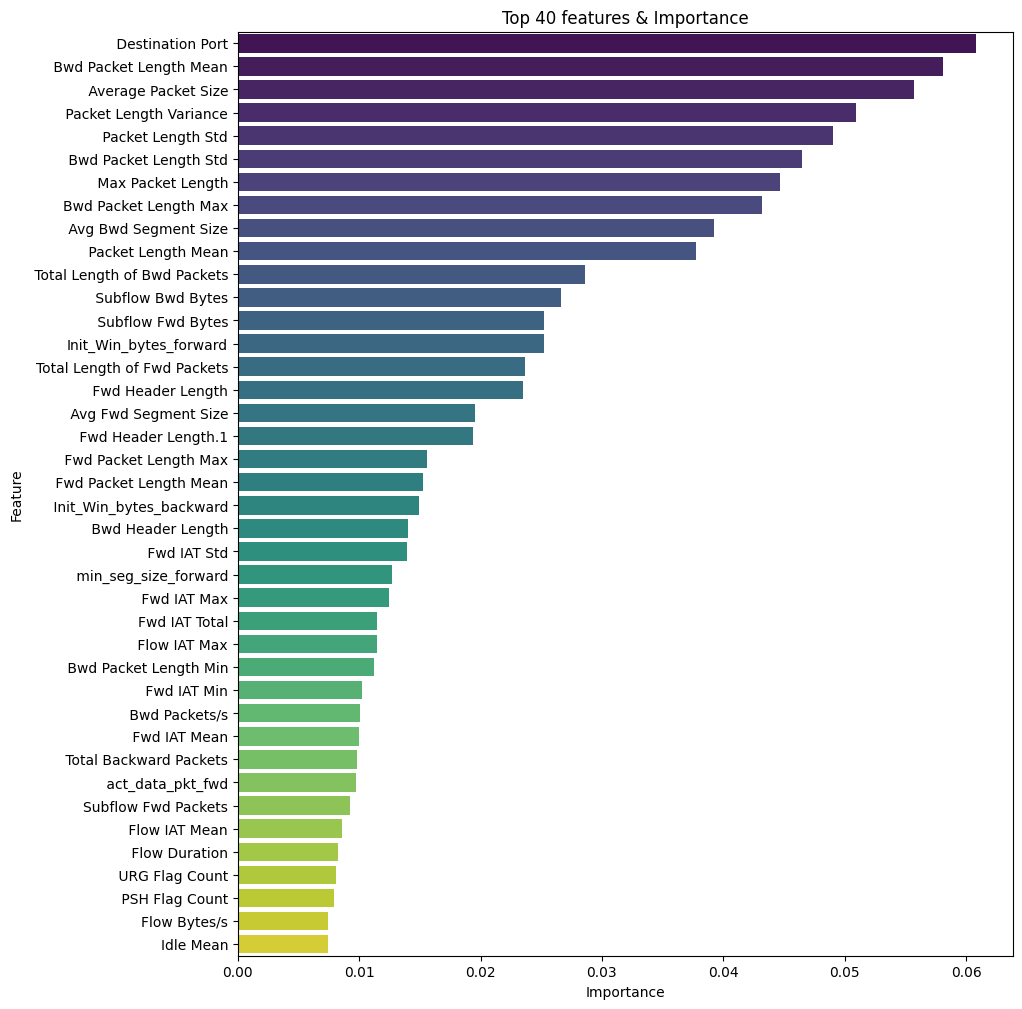

In [14]:
#using tree feature importance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
imp_features = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': imp_features})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Ploting the most important 40 features
plt.figure(figsize=(10,12))
sns.barplot(x='Importance', y= 'Feature', data = feature_importance_df.head(40), palette='viridis', orient='h')
plt.title('Top 40 features & Importance')
plt.show()


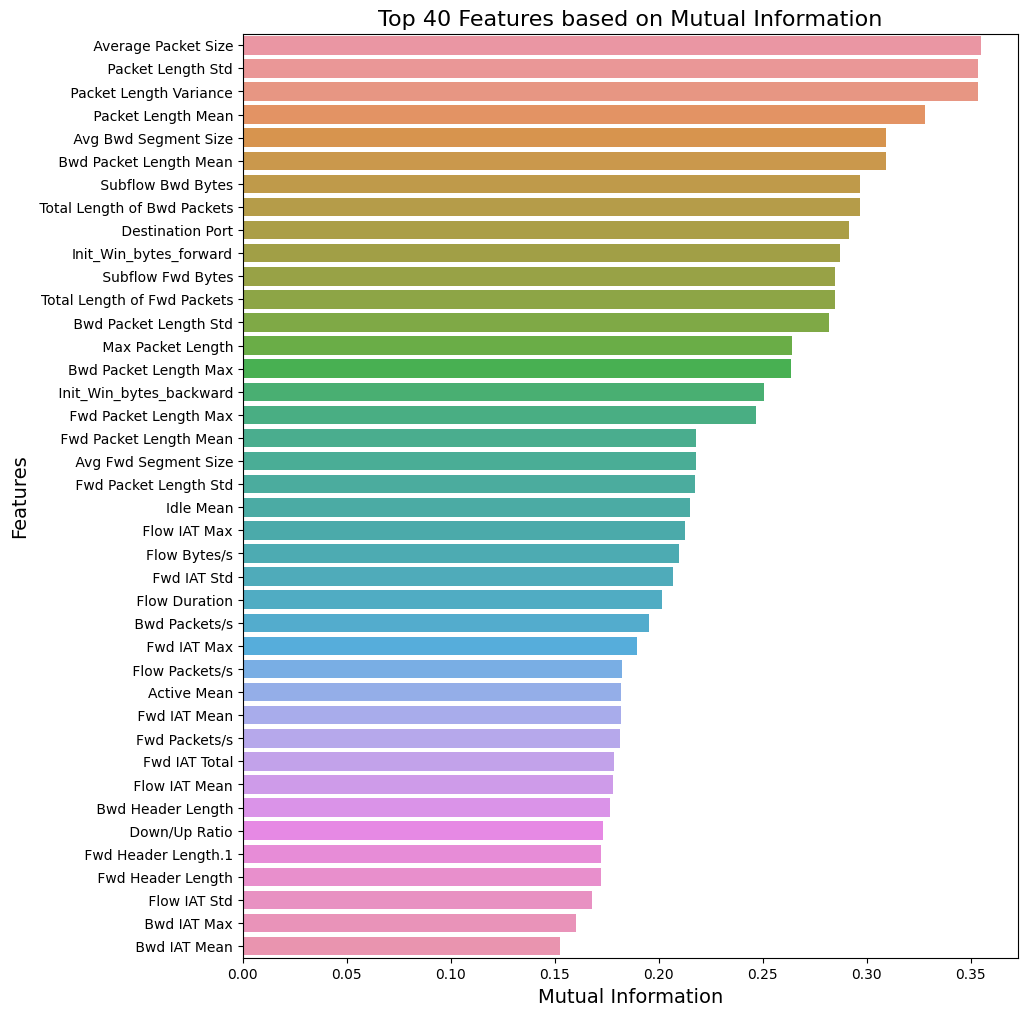

In [15]:
# Using Mutual information statistical method:
from sklearn.feature_selection import mutual_info_classif
m_info = mutual_info_classif(X, y)
top_features_minfo = pd.DataFrame({'Feature':X.columns, 'Mutual_Information':m_info})
feature_minfo = top_features_minfo.sort_values(by='Mutual_Information', ascending = False)
top_features_m_info = feature_minfo.head(40)

#Then ploting the most important 40 features
plt.figure(figsize=(10, 12))
sns.barplot(x='Mutual_Information', y='Feature', data=feature_minfo.head(40), orient='h')
plt.xlabel('Mutual Information', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 40 Features based on Mutual Information', fontsize=16)
plt.show()

These are the most important 40 features based on Mutual information mehtod and the feature importance based on tree method

In [16]:
top_features_m_info.head()

,Feature,Mutual_Information
52,Average Packet Size,0.354843
41,Packet Length Std,0.353685
42,Packet Length Variance,0.353637
40,Packet Length Mean,0.327936
54,Avg Bwd Segment Size,0.309379


Now, dealing with the bias in dataset!
There are multiple techniques for dealing with the bias in class in the datase:


1.   OverSampling for the minority class
2.   UnderSampling for the majority class
3.   Taking some of the majority class and all of the minority class



Trying with the SMOTE oversampling
trying the "Auto" Strategy for SMOTE

In [10]:
# Using shape attribute
num_records = data.shape[0]
print(f"Number of records in the DataFrame: {num_records}")

# Alternatively, using len() function
num_records = len(data)
print(f"Number of records in the DataFrame: {num_records}")

Number of records in the DataFrame: 2827876
Number of records in the DataFrame: 2827876


Text(0, 0.5, 'Count')

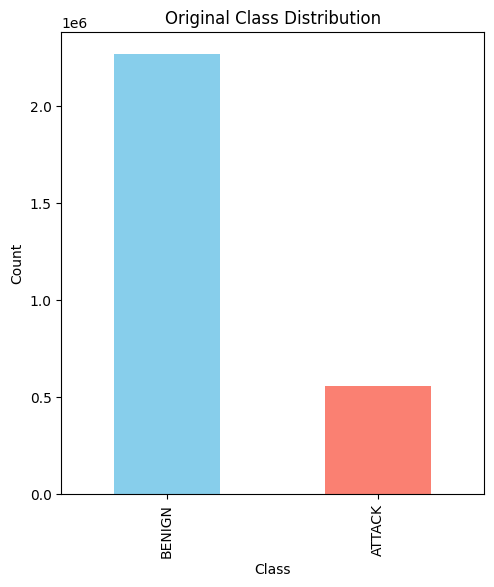

In [11]:
# Separate the features and labels
X = data.drop(" Label", axis=1)
y = data[" Label"]

# Plot the original class distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
original_class_distribution = y.value_counts()
original_class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Fit and apply SMOTE only on the training data to avoid data leakage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


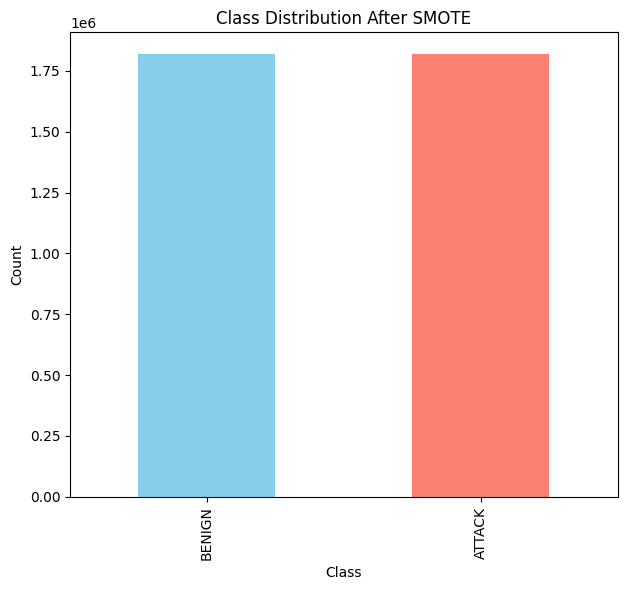

In [13]:
# Plot the class distribution after applying SMOTE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
resampled_class_distribution = pd.Series(y_train_resampled).value_counts()
resampled_class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

So thr graphs above show that the difference between classes is significantly decreased

## Model selection and training
<br> for this part I will use the top 40 features resulted from the mutual information from earlier and the resampled data from SMOTE

Trying with the Random Forest Classifier

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.9991

Confusion Matrix:
[[111350    137]
 [   395 453694]]

Classification Report:
              precision    recall  f1-score   support

      ATTACK       1.00      1.00      1.00    111487
      BENIGN       1.00      1.00      1.00    454089

    accuracy                           1.00    565576
   macro avg       1.00      1.00      1.00    565576
weighted avg       1.00      1.00      1.00    565576



In [28]:
from sklearn.metrics import f1_score

# Evaluate the performance using F1 score
f1_rf = f1_score(y_test, y_pred, average='weighted')

# Print the F1 score
print(f'Random Forest - F1 Score: {f1_rf:.4f}')

Random Forest - F1 Score: 0.9991


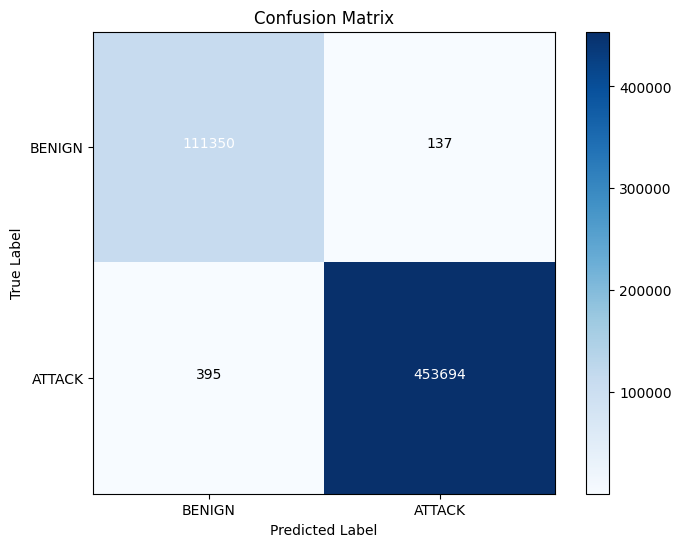

In [26]:
# plotting the resulting confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['BENIGN', 'ATTACK']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if i == j else "black")

plt.show()

In [29]:
pip install xgboost


In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Combine the original training and testing sets
X_combined = pd.concat([X_train, X_test])
y_combined = np.concatenate([y_train, y_test])

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Fit and apply SMOTE only on the combined data to avoid data leakage
X_combined_resampled, y_combined_resampled = smote.fit_resample(X_combined, y_combined)

# Split the combined data back into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_combined_resampled, y_combined_resampled, test_size=0.2, random_state=42)

# Convert string labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_resampled_encoded = label_encoder.transform(y_test_resampled)

# Train XGBoost model
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_resampled, y_train_resampled_encoded)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test_resampled)

# Inverse transform the predicted labels to get the original class names
y_pred_original = label_encoder.inverse_transform(y_pred_xgb)
y_test_original = label_encoder.inverse_transform(y_test_resampled_encoded)

# Evaluate the performance
accuracy_xgb = accuracy_score(y_test_original, y_pred_original)
conf_matrix_xgb = confusion_matrix(y_test_original, y_pred_original)
classification_rep_xgb = classification_report(y_test_original, y_pred_original)

print(f'XGBoost - Accuracy: {accuracy_xgb:.4f}')
print('\nXGBoost - Confusion Matrix:')
print(conf_matrix_xgb)
print('\nXGBoost - Classification Report:')
print(classification_rep_xgb)


XGBoost - Accuracy: 0.9994

XGBoost - Confusion Matrix:
[[454310     55]
 [   471 453692]]

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454365
           1       1.00      1.00      1.00    454163

    accuracy                           1.00    908528
   macro avg       1.00      1.00      1.00    908528
weighted avg       1.00      1.00      1.00    908528



In [43]:
from sklearn.metrics import f1_score
# Calculate and print the F1 score
f1_xgb = f1_score(y_test_original, y_pred_original, average='weighted')
print(f'XGBoost - F1 Score: {f1_xgb:.4f}')



XGBoost - F1 Score: 0.9994


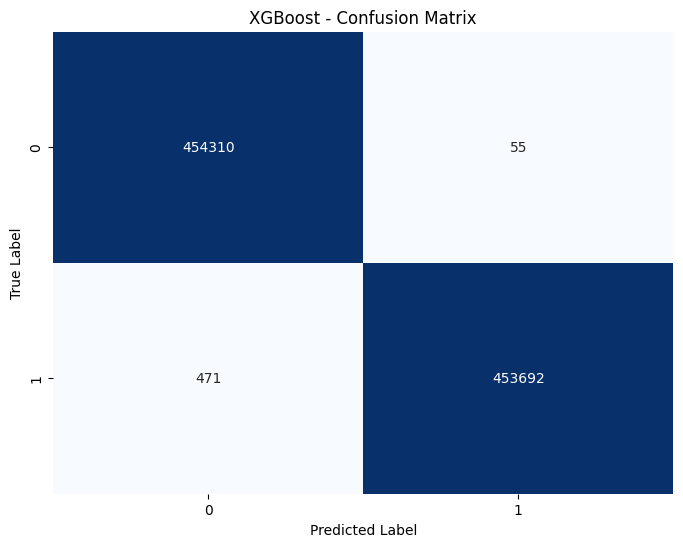

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [16]:
# Input layer

inputFeatures = Input(78)

# Additional layers and neurons
fc1 = Dense(64, activation='relu')(inputFeatures)
fc2 = Dense(32, activation='relu')(fc1)

# Output layer with sigmoid activation for binary classification
fcRes = Dense(1, activation='sigmoid')(fc2)

# Define the final architecture of the neural network
model = Model(inputs=inputFeatures, outputs=fcRes)

# Print the summary of the final architecture and the number of trainable parameters
print(model.summary())

# Compile the neural network model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 78)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                5056      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7169 (28.00 KB)
Trainable params: 7169 (28.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [47]:
print(y_train_resampled)
print(y_test)

[1 0 1 ... 1 0 1]
[1 1 1 ... 1 1 1]


In [18]:
# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the original labels
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

In [19]:
history = model.fit(X_train_resampled, y_train_resampled_encoded, validation_data=(X_test, y_test_encoded), epochs=4, batch_size=64)

Epoch 1/4
56789/56789 [==============================] - 176s 3ms/step - loss: 2756.3716 - accuracy: 0.8597 - val_loss: 0.6097 - val_accuracy: 0.6716
Epoch 2/4
56789/56789 [==============================] - 169s 3ms/step - loss: 26.9709 - accuracy: 0.8174 - val_loss: 0.3175 - val_accuracy: 0.7427
Epoch 3/4
56789/56789 [==============================] - 168s 3ms/step - loss: 3.0465 - accuracy: 0.8528 - val_loss: 0.3046 - val_accuracy: 0.9459
Epoch 4/4
56789/56789 [==============================] - 167s 3ms/step - loss: 52.4029 - accuracy: 0.7943 - val_loss: 0.4759 - val_accuracy: 0.4874


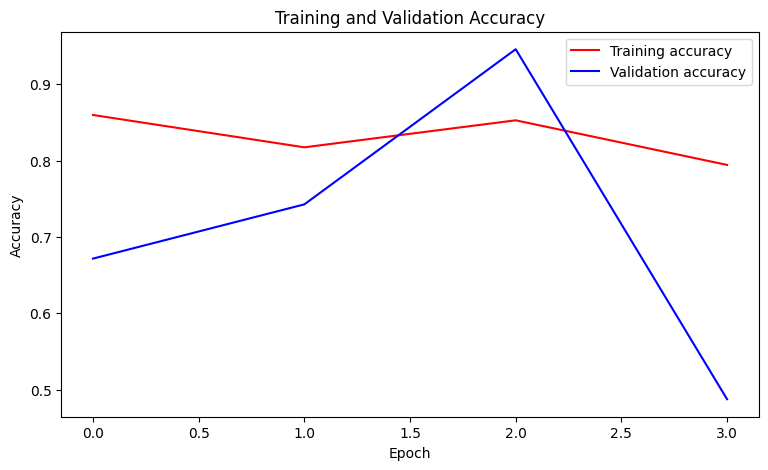

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


epochs = range(len(acc))


plt.figure(figsize=(9, 5))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

base_classifier = DecisionTreeClassifier(max_depth=2, random_state=42)

# Initialize the AdaBoost model
ada_boost_model = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)


# Train the AdaBoost model
ada_boost_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on both training and testing sets
y_pred_train = ada_boost_model.predict(X_train_resampled)
y_pred_test = ada_boost_model.predict(X_test)

# Evaluate performance
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
f1_train = f1_score(y_train_resampled, y_pred_train, average='weighted')

accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Print the results
print(f'Training Accuracy: {accuracy_train:.4f}, Training F1 Score: {f1_train:.4f}')
print(f'Testing Accuracy: {accuracy_test:.4f}, Testing F1 Score: {f1_test:.4f}')


Training Accuracy: 0.9981, Training F1 Score: 0.9981
Testing Accuracy: 0.9978, Testing F1 Score: 0.9978


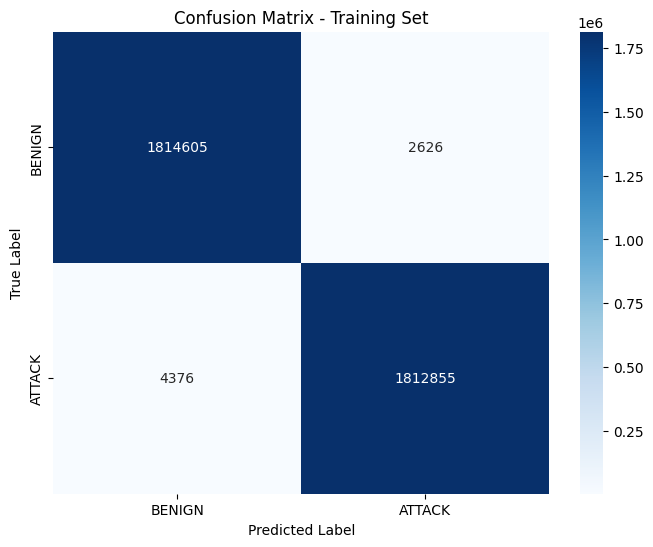

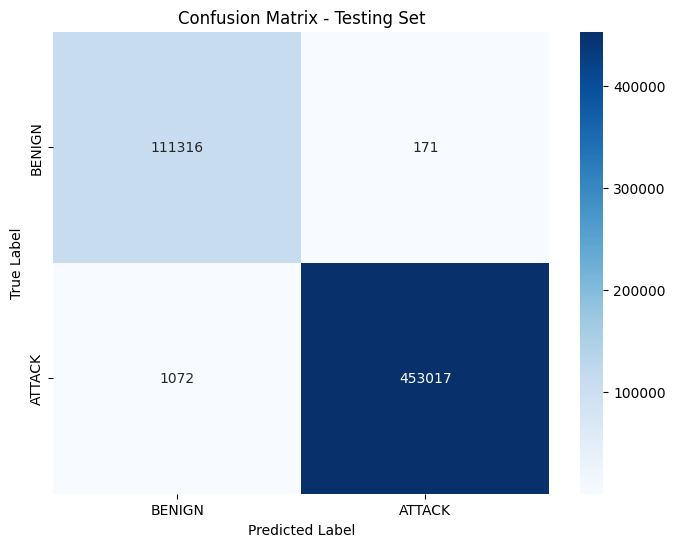

In [25]:
from sklearn.metrics import confusion_matrix

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train_resampled, y_pred_train), annot=True, fmt='d', cmap='Blues', xticklabels=['BENIGN', 'ATTACK'], yticklabels=['BENIGN', 'ATTACK'])
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for testing set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues', xticklabels=['BENIGN', 'ATTACK'], yticklabels=['BENIGN', 'ATTACK'])
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Initialize models
models = {
    'xgboost': xgb.XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'adaboost': AdaBoostClassifier(),
}

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score'])

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform the original labels
y_train_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Evaluate each model and store the results
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_encoded)
    y_pred_encoded = model.predict(X_test)

    # Inverse transform the predicted labels to get the original class names
    y_pred_original = label_encoder.inverse_transform(y_pred_encoded)

    accuracy = accuracy_score(y_test, y_pred_original)
    f1 = f1_score(y_test, y_pred_original, average='weighted')

    results_df = results_df.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1
    }, ignore_index=True)


<ipython-input-29-9b6736d580e3>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-29-9b6736d580e3>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-29-9b6736d580e3>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [30]:
# Print the results_df
print(results_df)

           Model  Accuracy  F1 Score
0        xgboost  0.999171  0.999171
1  Random Forest  0.999063  0.999063
2       adaboost  0.987551  0.987665


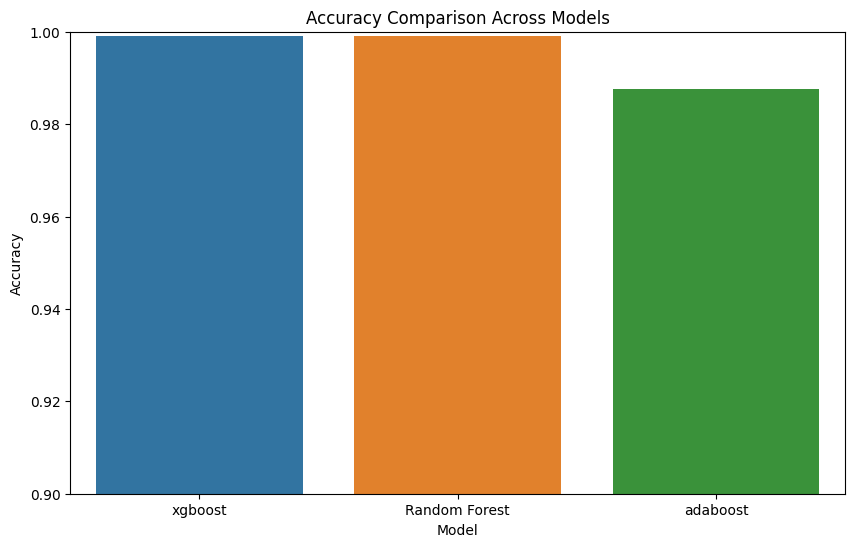

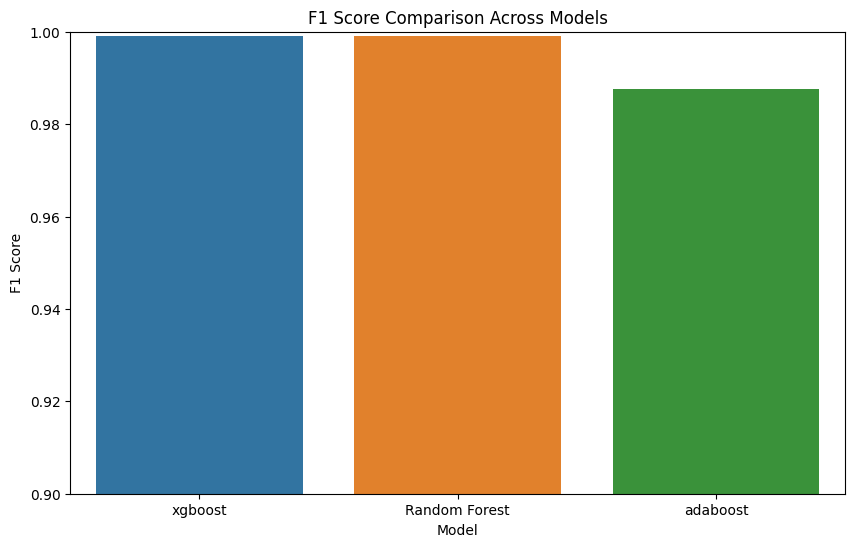

In [33]:
# Plot bar graphs with a margin
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Accuracy Comparison Across Models')
plt.ylim(0.9, 1.0)  # Set y-axis limit with a small margin
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=results_df)
plt.title('F1 Score Comparison Across Models')
plt.ylim(0.9, 1.0)  # Set y-axis limit with a small margin
plt.show()
